In [4]:
from pymatgen import MPRester, Composition
import re
import pprint

# Make sure that you have the Materials API key. Put the key in the call to
# MPRester if needed, e.g, MPRester("MY_API_KEY")
mpr = MPRester("My4uQtdozwxRfOZq")

Structures with similar stoichiometry to Fe2O3

In [6]:
comp = Composition("Fe2O3")
anon_formula = comp.anonymized_formula
# We need to convert the formula to the dict form used in the database.
anon_formula = {m.group(1): int(m.group(2)) 
                for m in re.finditer(r"([A-Z]+)(\d+)", anon_formula)}

data = mpr.query({"anonymous_formula": anon_formula}, 
                 properties=["task_id", "pretty_formula", "structure"])
print(len(data))  #Should show ~600 data.

1099


In [7]:
# data now contains a list of dict. This shows you what each dict has.
# Note that the mp id is named "task_id" in the database itself.
pprint.pprint(data[0])  

{'pretty_formula': 'Ca3N2',
 'structure': Structure Summary
Lattice
    abc : 4.60114 4.60114 4.60114
 angles : 90.0 90.0 90.0
 volume : 97.40838513596154
      A : 4.60114 0.0 0.0
      B : 0.0 4.60114 0.0
      C : 0.0 0.0 4.60114
PeriodicSite: Ca (0.0000, 2.3006, 2.3006) [0.0000, 0.5000, 0.5000]
PeriodicSite: Ca (2.3006, 0.0000, 2.3006) [0.5000, 0.0000, 0.5000]
PeriodicSite: Ca (2.3006, 2.3006, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: N (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: N (2.3006, 2.3006, 2.3006) [0.5000, 0.5000, 0.5000],
 'task_id': 'mp-1013524'}


# Band structures

In [11]:
bs = mpr.get_bandstructure_by_material_id("mp-1013524")
from pymatgen.electronic_structure.plotter import BSPlotter
%matplotlib inline

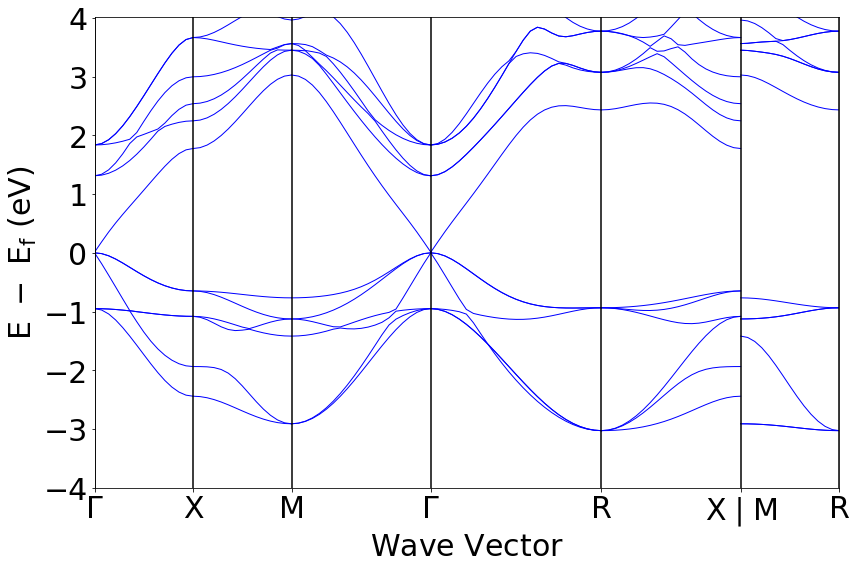

In [12]:
plotter = BSPlotter(bs)
plotter.show()